# Breast Cancer Diagnosis Classification Project

Julie Compston - July 2025 - github.com/jcompston

In this project, I will experiment with different classification algorithms to learn a model that can accurately classify whether a tumor is malignant or benign. The data used in the notebook was downloaded from the UCI Machine Learning Repository and was initially collected by W.N. Street, W.H. Wolberg and O.L. Mangasarian at the University of Wisconsin.

#### Import Libraries

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix

## Preparing Data

#### Load Data into Dataframe

In [4]:
headers = ["id", "diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", \
           "compactness1", "concavity1", "concave_points1", "symmetry1", "frac_dim1", \
           "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", \
           "concavity2", "concave_points2", "symmetry2", "frac_dim2", "radius3", "texture3", \
           "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", \
           "concave_points3", "symmetry3", "frac_dim3"]

df = pd.read_csv('wdbc.data', names=headers)

#### Separating Features and Target Variable

In [5]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

#### Train / Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Scaling Features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Classifier Models

#### Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

#### Logistic Regression

In [9]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

#### SVM

In [10]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

## Evaluating Performance

#### Mean Accuracy

In [31]:
rfc_score = rfc.score(X_test, y_test)
log_score = log.score(X_test, y_test)
svm_score = svm.score(X_test, y_test)

print(f'Random Forest Score: {rfc_score}')
print(f'Logistic Regression Score: {log_score}')
print(f'SVM Score: {svm_score}')

Random Forest Score: 0.9707602339181286
Logistic Regression Score: 0.9824561403508771
SVM Score: 0.9766081871345029


#### F1 Scores

In [12]:
rfc_f1 = f1_score(y_test, rfc_pred, average=None, labels=["B","M"])
log_f1 = f1_score(y_test, log_pred, average=None, labels=["B","M"])
svm_f1 = f1_score(y_test, svm_pred, average=None, labels=["B","M"])

print(f'Random Forest F1 Score: {rfc_f1}')
print(f'Logistic Regression F1 Score: {log_f1}')
print(f'SVM F1 Score: {svm_f1}')

Random Forest F1 Score: [0.97716895 0.95934959]
Logistic Regression F1 Score: [0.98604651 0.97637795]
SVM F1 Score: [0.98148148 0.96825397]


#### Confusion Matrices

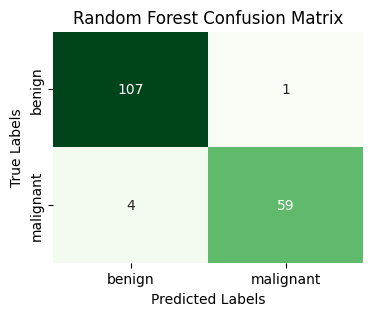

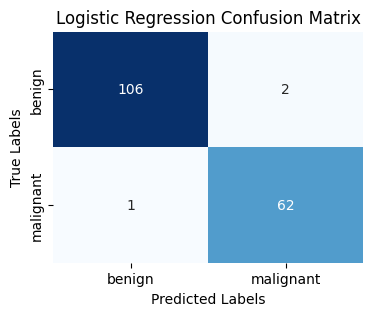

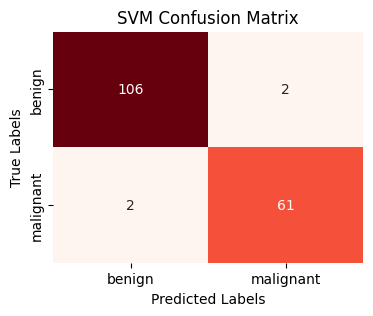

In [13]:
diagnosis = ["benign", "malignant"]

# Random Forest Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, rfc_pred)

plt.figure(figsize=(4, 3))
sn.heatmap(rfc_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels=diagnosis, yticklabels=diagnosis)

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


#Logistic Regression Confusion Matrix
log_conf_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(4, 3))
sn.heatmap(log_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=diagnosis, yticklabels=diagnosis)

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


# SVM Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(4, 3))
sn.heatmap(svm_conf_matrix, annot=True, fmt='g', cmap='Reds', cbar=False, xticklabels=diagnosis, yticklabels=diagnosis)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.show()

## Implementing Voting

### Voting Classifier

In [14]:
vote_soft = VotingClassifier(estimators=[('rfc', rfc), ('log', log), ('svm', svm)], voting='soft')
vote_soft.fit(X_train, y_train)
vote_soft_pred = vote_soft.predict(X_test)

### Evaluation

#### Mean Accuracy

In [15]:
vote_soft.score(X_test, y_test)

0.9766081871345029

#### F1 Score

In [16]:
vote_soft_f1 = f1_score(y_test, vote_soft_pred, average=None, labels=["B","M"])

print(f'Soft Vote F1 Score: {vote_soft_f1}')

Soft Vote F1 Score: [0.98148148 0.96825397]


#### Confusion Matrix

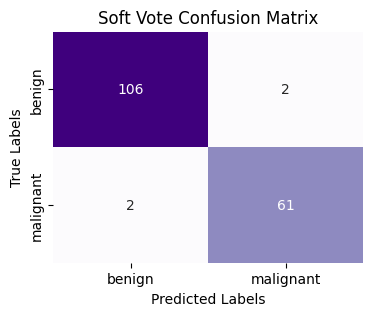

In [17]:
vote_conf_matrix = confusion_matrix(y_test, vote_soft_pred)

plt.figure(figsize=(4,3))
sn.heatmap(vote_conf_matrix, annot=True, fmt='g', cmap='Purples', cbar=False, xticklabels=diagnosis, yticklabels=diagnosis)

plt.title("Soft Vote Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Conclusion

Though the voting mechanism returns a 97.66% accuracy score with an identical confusion matrix to the SVM classifier, the Logistic Regression classifier returns the highest accuracy score at 98.25% accuracy. Fine tuning could be implemented for data with more imperfections, though experimenting with GridSearchCV from sklearn.model_selection did not yield significant parameter tuning opportunities for these models.